In [94]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils

In [95]:
def convolve_im(im: np.array,
                fft_kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the frequency kernel (fft_kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

    Args:
        im: np.array of shape [H, W]
        fft_kernel: np.array of shape [H, W] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    padded_im = np.pad(im, ((0, 2* im.shape[0]), (0, 2 * im.shape[1])), 'constant')
    fft = np.fft.fft2(padded_im)
    # Make the kernel the same size as the image
    fft_kernel = skimage.transform.resize(fft_kernel, padded_im.shape)
    filtered_fft = fft * fft_kernel
    conv_result = np.fft.ifft2(filtered_fft)
    conv_result = np.real(conv_result)
    conv_result = conv_result[:im.shape[0], :im.shape[1]]
    
    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        plt.subplot(1, 5, 2)
        # Visualize FFT 
        plt.imshow(np.log(np.abs(np.fft.fftshift(fft))), cmap="gray")
        
        plt.subplot(1, 5, 3)
        # Visualize FFT kernel
        plt.imshow(np.abs(np.fft.fftshift(fft_kernel)), cmap="gray")
        plt.subplot(1, 5, 4)
        plt.imshow((np.abs(np.fft.fftshift(filtered_fft))), cmap="gray")
        # Visualize filtered FFT image
        plt.subplot(1, 5, 5) 
        # Visualize filtered spatial image
        plt.imshow(conv_result, cmap="gray")

    ### END YOUR CODE HERE ###
    return conv_result

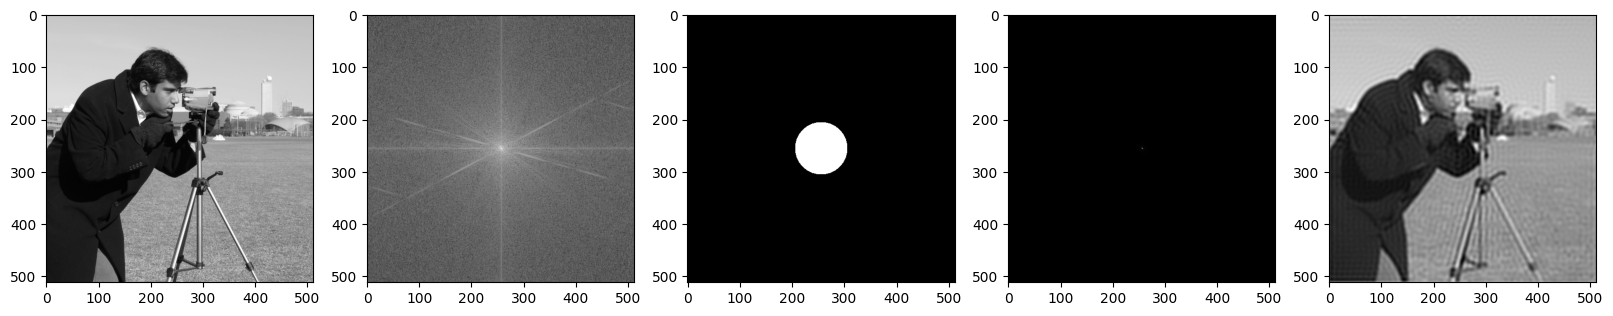

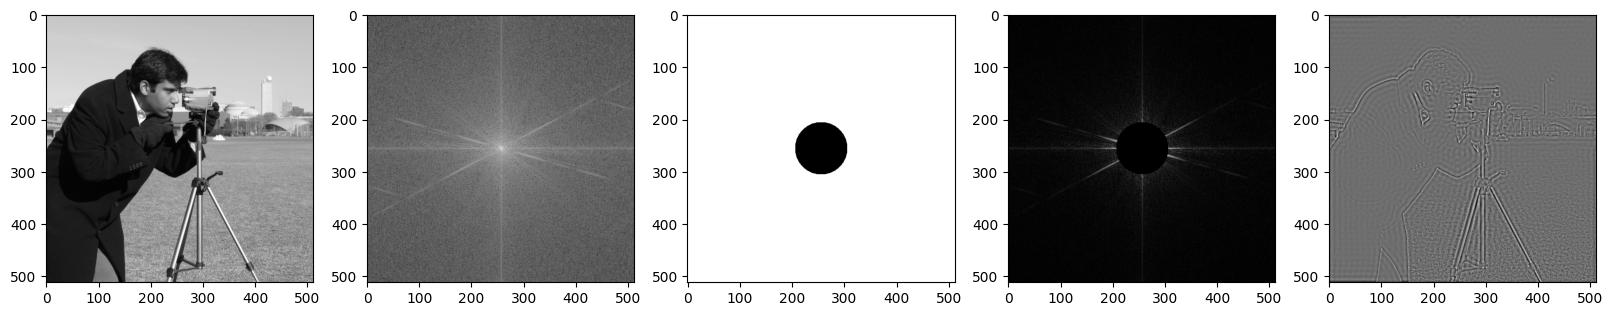

/home/bard/Documents/school/gruvis/TDT4195/assignment 2/utils.py:82: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")


Saving image to: image_processed/camera_low_pass.png
Saving image to: image_processed/camera_high_pass.png


In [96]:
if __name__ == "__main__":
    verbose = True
    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)
    # DO NOT CHANGE
    frequency_kernel_low_pass = utils.create_low_pass_frequency_kernel(im, radius=50)
    image_low_pass = convolve_im(im, frequency_kernel_low_pass,
                                 verbose=verbose)
    # DO NOT CHANGE
    frequency_kernel_high_pass = utils.create_high_pass_frequency_kernel(im, radius=50)
    image_high_pass = convolve_im(im, frequency_kernel_high_pass,
                                  verbose=verbose)

    if verbose:
        plt.show()
    utils.save_im("camera_low_pass.png", image_low_pass)
    utils.save_im("camera_high_pass.png", image_high_pass)